# Contexto da Análise

Acredito que a pratica faz a perfeição, então, desde que comecei a gostar e aprender sobre analise dados decide que colocaria em pratica o que estou aprendendo. Então, essa analise assim como as outras do meu repositório são meramente para fins de aprendizado e de expor meu trabalho para quem se interessa em aprender comigo ou pelo meu trabalho.

Para isso, a princípio sempre usarei dados abertos fornecidos por governos, universidades e sites especializados nesse quesito como Kaggle.

Em relação ao conjunto de dados que escolhi para esta análise, eu tenho como uma das paixões o futebol e a Premir League na Inglaterra é um dos campeonatos de futebol que eu mais gosto de assistir, ler, ouvir e conversar sobre. Então, ao ter acesso aos dados sobre a liga vi oportunidade de me divertir e também de praticar um pouco mais a análise de dados.

Assim, espero que todos que decidirem por ver esse projeto conheçam mais sobre a Premier League assim como eu vou conhecer agora ao analisar o campeonato de uma forma mais estatística.

Finalmente posso dizer o que vou analisar com mais detalhes: os gols da Premier Legue entre as temporadas 2010/2011 a 2019/2020.


### Fonte: https://www.kaggle.com/taranguyen/english-premier-league-data-for-10-seasons

Gostaria de agradecer a todos que trabalharam para primeiro coletar esses dados e tambem a todos que fizeram possivel esses dados estarem abertos.

## Carregando os pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

%reload_ext watermark
%watermark -a "Paulo Henrique Pinto" --iversions

Author: Paulo Henrique Pinto

seaborn   : 0.11.1
pandas    : 1.2.4
numpy     : 1.20.1
matplotlib: 3.2.1



## Importando o conjunto de dados

In [2]:
dataset = pd.read_csv("epl-allseasons-matchstats.csv") # Carregando os dados

In [3]:
dataset.head() # Prmeira visualização dos dados 

,Season,Date,Referee,HomeTeam,AwayTeam,FullTime,Halftime,HomeGoals,HomeGoalsHalfTime,HomeShots,...,HomeYellowCards,HomeRedCards,AwayGoals,AwayGoalsHalfTime,AwayShots,AwayShotsOnTarget,AwayCorners,AwayFouls,AwayYellowCards,AwayRedCards
0,2010/11,2010-08-14,M Dean,Aston Villa,West Ham,HomeWin,HomeWin,3,2,23,...,1,0,0,0,12,2,7,15,2,0
1,2010/11,2010-08-14,P Dowd,Blackburn,Everton,HomeWin,HomeWin,1,1,7,...,2,0,0,0,17,12,3,14,1,0
2,2010/11,2010-08-14,S Attwell,Bolton,Fulham,Draw,Draw,0,0,13,...,1,0,0,0,12,7,8,13,3,0
3,2010/11,2010-08-14,M Clattenburg,Chelsea,West Brom,HomeWin,HomeWin,6,2,18,...,1,0,0,0,10,4,1,10,0,0
4,2010/11,2010-08-14,A Taylor,Sunderland,Birmingham,Draw,HomeWin,2,1,6,...,3,1,2,0,13,7,6,10,3,0


In [4]:
dataset.shape # Analisando a quantidade de registros presentes na tabela

(3800, 23)

In [5]:
dataset.info() # Analisando mais a fundo os tipos de dados presentes na tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             3800 non-null   object
 1   Date               3800 non-null   object
 2   Referee            3800 non-null   object
 3   HomeTeam           3800 non-null   object
 4   AwayTeam           3800 non-null   object
 5   FullTime           3800 non-null   object
 6   Halftime           3800 non-null   object
 7   HomeGoals          3800 non-null   int64 
 8   HomeGoalsHalfTime  3800 non-null   int64 
 9   HomeShots          3800 non-null   int64 
 10  HomeShotsOnTarget  3800 non-null   int64 
 11  HomeCorners        3800 non-null   int64 
 12  HomeFouls          3800 non-null   int64 
 13  HomeYellowCards    3800 non-null   int64 
 14  HomeRedCards       3800 non-null   int64 
 15  AwayGoals          3800 non-null   int64 
 16  AwayGoalsHalfTime  3800 non-null   int64 


## Limpeza e Tratamento dos dados

In [6]:
dataset.isnull().sum() # Verificando se existe algum dado nulo

Season               0
Date                 0
Referee              0
HomeTeam             0
AwayTeam             0
FullTime             0
Halftime             0
HomeGoals            0
HomeGoalsHalfTime    0
HomeShots            0
HomeShotsOnTarget    0
HomeCorners          0
HomeFouls            0
HomeYellowCards      0
HomeRedCards         0
AwayGoals            0
AwayGoalsHalfTime    0
AwayShots            0
AwayShotsOnTarget    0
AwayCorners          0
AwayFouls            0
AwayYellowCards      0
AwayRedCards         0
dtype: int64

In [7]:
# Como algumas colunas do dataset não vão ser "uteis" nessa análise eu optei por retirá-las.

new_dataset = dataset

new_dataset.drop('AwayFouls', axis=1, inplace=True)
new_dataset.drop('AwayYellowCards', axis=1, inplace=True)
new_dataset.drop('AwayRedCards', axis=1, inplace=True)
new_dataset.drop('HomeFouls', axis=1, inplace=True)
new_dataset.drop('HomeYellowCards', axis=1, inplace=True)
new_dataset.drop('HomeRedCards', axis=1, inplace=True)

## Análise Exploratória

In [29]:
new_dataset.groupby('Season').sum() # somatório de cada dado por temporada

,HomeGoals,HomeGoalsHalfTime,HomeShots,HomeShotsOnTarget,HomeCorners,AwayGoals,AwayGoalsHalfTime,AwayShots,AwayShotsOnTarget,AwayCorners
Season,,,,,,,,,,
2010/11,617,276,5245,2910,2297,446,200,4204,2263,1899
2011/12,604,267,5523,3114,2471,462,197,4345,2462,1856
2012/13,592,246,5367,3024,2401,471,218,4185,2386,1837
2013/14,598,266,5683,1914,2317,454,197,4531,1477,1776
2014/15,560,277,5557,1795,2292,415,185,4289,1399,1770
2015/16,567,256,5439,1759,2260,459,201,4320,1475,1857
2016/17,607,268,5325,1829,2158,457,194,4364,1465,1799
2017/18,582,231,5164,1759,2183,436,196,4126,1431,1728
2018/19,596,258,5371,1816,2168,476,218,4235,1493,1730


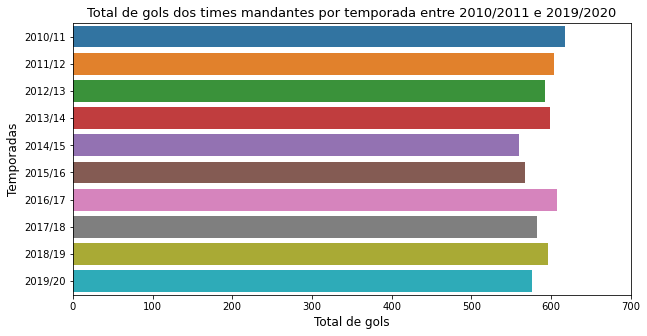

In [9]:
# Comparação através de Análise gráfica do total de gols dos times da casa por temporada

plt.figure(figsize=(10, 5))
plt.xlim(0,700)
sns.barplot(data=new_dataset, x="HomeGoals", y="Season", estimator=sum, orient='h', ci=None)
plt.title("Total de gols dos times mandantes por temporada entre 2010/2011 e 2019/2020", fontsize = 13)
plt.xlabel("Total de gols", fontsize = 12)
plt.ylabel("Temporadas", fontsize = 12)
plt.show()

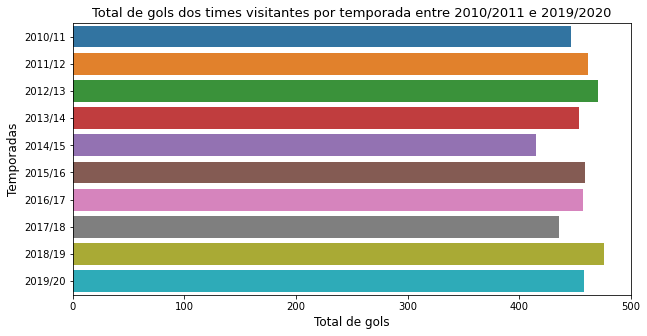

In [27]:
# Comparação através de Análise gráfica do total de gols dos times visitantes por temporada

plt.figure(figsize=(10, 5))
plt.xlim(0,500)
sns.barplot(data=new_dataset, x="AwayGoals", y="Season", estimator=sum, orient='h', ci=None)
plt.title("Total de gols dos times visitantes por temporada entre 2010/2011 e 2019/2020", fontsize = 13)
plt.xlabel("Total de gols", fontsize = 12)
plt.ylabel("Temporadas", fontsize = 12)
plt.show()

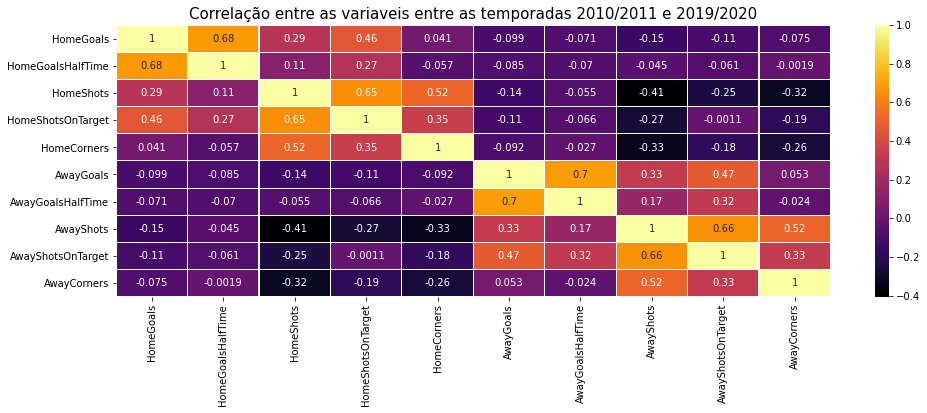

In [11]:
corr = new_dataset.corr() # o metodo corr calcula a correlação entre todas as variaveis
plt.figure(figsize=(16, 5))
sns.heatmap(corr, cmap = "inferno", linewidth = 0.1, annot=True) # o codigo de cor do cmap vem do matplotlib
plt.title("Correlação entre as variaveis entre as temporadas 2010/2011 e 2019/2020", fontsize = 15)
plt.show()

In [12]:
# Número de gols dos times da casa em que cada arbitro esteve presente
# A fins organizacionais da analise optei por mostrar apenas os 10 arbitros que presenciaram mais gols.

RefereesHome = new_dataset.groupby('Referee').sum().sort_values('HomeGoals', ascending=False)

RefereesHome.head(10)

,HomeGoals,HomeGoalsHalfTime,HomeShots,HomeShotsOnTarget,HomeCorners,AwayGoals,AwayGoalsHalfTime,AwayShots,AwayShotsOnTarget,AwayCorners
Referee,,,,,,,,,,
M Dean,450,193,4162,1708,1778,345,151,3202,1312,1356
M Oliver,431,181,3785,1486,1618,323,145,3099,1226,1332
M Atkinson,420,187,4023,1570,1630,309,135,3068,1197,1329
A Taylor,411,200,3564,1361,1511,304,127,3126,1229,1227
A Marriner,394,182,3538,1440,1459,334,154,2833,1166,1169
K Friend,340,146,3068,1222,1279,270,124,2363,956,1025
J Moss,335,143,3166,1151,1311,289,129,2523,967,987
L Mason,334,150,3075,1226,1326,259,121,2383,972,1087
M Clattenburg,272,124,2287,986,1000,211,95,2173,909,962


In [13]:
# Número de gols dos times visitantes em que cada arbitro esteve presente
# A fins organizacionais da analise optei por mostrar apenas os 10 arbitros que presenciaram mais gols.

RefereesAway = new_dataset.groupby('Referee').sum().sort_values('AwayGoals', ascending=False)

RefereesAway.head(10)

,HomeGoals,HomeGoalsHalfTime,HomeShots,HomeShotsOnTarget,HomeCorners,AwayGoals,AwayGoalsHalfTime,AwayShots,AwayShotsOnTarget,AwayCorners
Referee,,,,,,,,,,
M Dean,450,193,4162,1708,1778,345,151,3202,1312,1356
A Marriner,394,182,3538,1440,1459,334,154,2833,1166,1169
M Oliver,431,181,3785,1486,1618,323,145,3099,1226,1332
M Atkinson,420,187,4023,1570,1630,309,135,3068,1197,1329
A Taylor,411,200,3564,1361,1511,304,127,3126,1229,1227
J Moss,335,143,3166,1151,1311,289,129,2523,967,987
K Friend,340,146,3068,1222,1279,270,124,2363,956,1025
L Mason,334,150,3075,1226,1326,259,121,2383,972,1087
M Clattenburg,272,124,2287,986,1000,211,95,2173,909,962


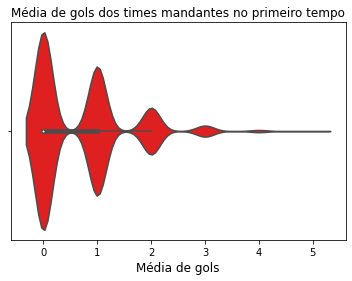

In [14]:
# Representação gráfica da média de gols dos times da casa que ocorreram durante o primeiro tempo

sns.violinplot(new_dataset["HomeGoalsHalfTime"], color = "red")
plt.title("Média de gols dos times mandantes no primeiro tempo", fontsize = 12)
plt.xlabel("Média de gols", fontsize = 12)
plt.show()

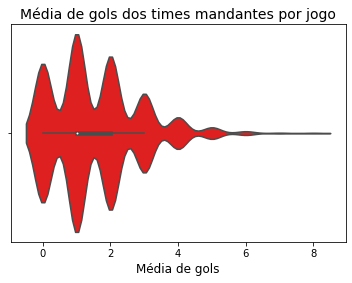

In [15]:
# Representação gráfica da média de gols dos times da casa durante um jogo inteiro

sns.violinplot(new_dataset["HomeGoals"], color = "red")
plt.title("Média de gols dos times mandantes por jogo", fontsize = 14)
plt.xlabel("Média de gols", fontsize = 12)
plt.show()

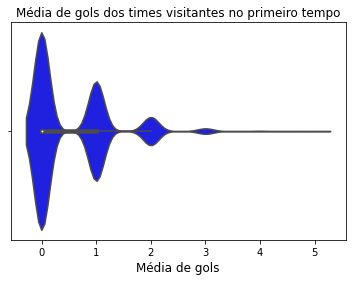

In [16]:
# Representação gráfica da média de gols dos times visitantes que ocorreram durante o primeiro tempo

sns.violinplot(new_dataset["AwayGoalsHalfTime"], color = "blue")
plt.title("Média de gols dos times visitantes no primeiro tempo", fontsize = 12)
plt.xlabel("Média de gols", fontsize = 12)
plt.show()

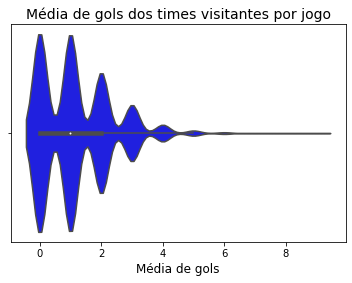

In [17]:
# Representação gráfica da média de gols dos times visitantes durante um jogo inteiro

sns.violinplot(new_dataset["AwayGoals"], color = "blue")
plt.title("Média de gols dos times visitantes por jogo", fontsize = 14)
plt.xlabel("Média de gols", fontsize = 12)
plt.show()

In [18]:
# Total de gols de cada time como mandante (tabela ordenada do maior para o menor de acordo com os gols da casa)
# A fins organizacionais da analise optei por mostrar apenas os 10 arbitros que presenciaram mais gols.

TotalHomeGoals = new_dataset.groupby('HomeTeam').sum().sort_values('HomeGoals', ascending=False)

TotalHomeGoals.head(10)

,HomeGoals,HomeGoalsHalfTime,HomeShots,HomeShotsOnTarget,HomeCorners,AwayGoals,AwayGoalsHalfTime,AwayShots,AwayShotsOnTarget,AwayCorners
HomeTeam,,,,,,,,,,
Man City,496,209,3464,1471,1501,143,59,1457,610,663
Liverpool,407,199,3396,1409,1358,160,63,1627,610,750
Arsenal,398,168,3069,1369,1379,167,87,1881,754,818
Chelsea,386,186,3314,1396,1328,164,67,1768,720,780
Man Utd,380,184,2988,1311,1222,158,55,1792,737,728
Tottenham,351,152,3261,1403,1335,174,77,1918,771,813
Everton,316,140,2721,1125,1186,205,88,2078,782,872
West Ham,247,111,2281,854,949,240,101,2195,889,863
Newcastle,240,99,2345,938,959,217,94,1990,791,838


In [19]:
# Total de gols de cada time como visitante (tabela ordenada do maior para o menor de acordo com os gols dos visitantes)
# A fins organizacionais da analise optei por mostrar apenas os 10 arbitros que presenciaram mais gols.

TotalAwayGoals = new_dataset.groupby('AwayTeam').sum().sort_values('AwayGoals', ascending=False)

TotalAwayGoals.head(10)

,HomeGoals,HomeGoalsHalfTime,HomeShots,HomeShotsOnTarget,HomeCorners,AwayGoals,AwayGoalsHalfTime,AwayShots,AwayShotsOnTarget,AwayCorners
AwayTeam,,,,,,,,,,
Man City,193,84,1827,775,770,362,173,2958,1233,1227
Liverpool,250,117,2067,864,835,322,143,2671,1156,1122
Tottenham,246,111,2369,946,987,306,130,2592,1106,1086
Chelsea,230,101,2152,889,875,305,139,2705,1074,1046
Arsenal,269,123,2384,957,1002,304,137,2399,1054,983
Man Utd,217,99,2431,945,965,301,143,2294,1002,1018
Everton,268,122,2554,1003,1069,212,97,2182,916,922
West Ham,281,120,2824,1090,1117,186,84,1813,688,808
Southampton,215,104,1896,688,862,171,78,1829,667,790


In [20]:
# Calculo detalhado da quantidade gols que ocorreram no primeiro e segundo tempo.

HomeGoals2Half = new_dataset['HomeGoals'] - new_dataset['HomeGoalsHalfTime']
HomeGoals1Half = new_dataset['HomeGoalsHalfTime']
HomeGoals = new_dataset['HomeGoals']

AwayGoals2Half = new_dataset['AwayGoals'] - new_dataset['AwayGoalsHalfTime']
AwayGoals1Half = new_dataset['AwayGoalsHalfTime']
AwayGoals = new_dataset['AwayGoals']

In [21]:
# Quantidade de gols que ocorreram em cada tempo e no total de dos times mandantes das partidas

tabela = {'HomeGoalsHalfTime': HomeGoals1Half, 'HomeGoals2Half': HomeGoals2Half, 'HomeGoals': HomeGoals}
GoalsHome = pd.DataFrame(tabela)
GoalsHome.sum()

HomeGoalsHalfTime    2611
HomeGoals2Half       3288
HomeGoals            5899
dtype: int64

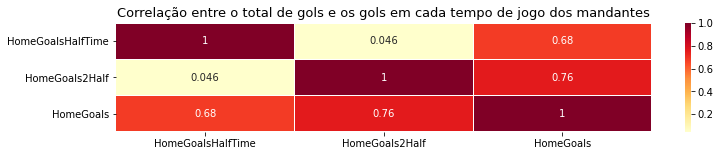

In [22]:
# Cálculo da correlação entre os gols em cada tempo e os gols totais dos times mandantes

corr = GoalsHome.corr() # Cálculo da correlação entre as variaveis
plt.figure(figsize=(12, 2))
sns.heatmap(corr, cmap = "YlOrRd", linewidth = 0.1, annot=True) # transformando a correlação em uma representação visual
plt.title("Correlação entre o total de gols e os gols em cada tempo de jogo dos mandantes", fontsize = 13)
plt.show()

In [23]:
# Quantidade de gols que ocorreram em cada tempo e no total de dos times visitantes das partidas

tabela2 = {'AwayGoalsHalfTime': AwayGoals1Half, 'AwayGoals2Half': AwayGoals2Half, 'AwayGoals': AwayGoals}
GoalsAway = pd.DataFrame(tabela2)
GoalsAway.sum()

AwayGoalsHalfTime    2015
AwayGoals2Half       2519
AwayGoals            4534
dtype: int64

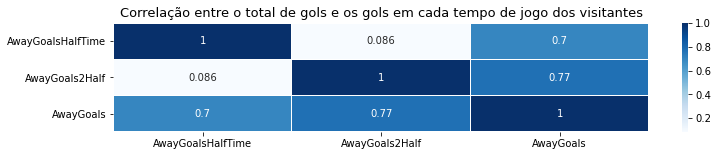

In [24]:
# Cálculo da correlação entre os gols em cada tempo e os gols totais dos times visitantes

corr = GoalsAway.corr() # # Cálculo da correlação entre as variaveis
plt.figure(figsize=(12, 2))
sns.heatmap(corr, cmap = "Blues", linewidth = 0.1, annot=True) # transformando a correlação em uma representação visual
plt.title("Correlação entre o total de gols e os gols em cada tempo de jogo dos visitantes", fontsize = 13)
plt.show()

## Conclusão

Depois de todas essas análises de fato é possivel tirar algumas conclusões interessantes a respeito da Premier League inglesa e dos seus clubes. Algumas dessas conclusões são mais previsiveis e outras um tanto que surpreendentes apesar de que para pessoas mais atentas ja pudessem ver alguns indicios delas.


Então, Vamos lá.


1. A primeira análise revelou que a temporada 2010/2011 com 617 foi a temporada em que os times mandantes fizeram mais gols. Já a temporada 2018/2019 com 476 foi onde times visitantes mais mostraram seu poder ofensivo.


2. No segundo momento, ao analisar a correlação entre as variáveis relacionadas aos goals (chutes, escanteios, etc.) temos a revelação de que tanto para os times da casa quanto para os visitantes há uma correlação forte entre os gols no primeiro tempo e o total de gols na partida. Isso é interessante porque não necessariamente a maioria dos gols irão ocorrer no primeiro tempo, mas que sempre que eles acontecce o número total de gols de uma partida tende a subir.
Essa constatação, pode indicar que gols no primeiro tempo aumentam a chance de vitoria para quem o(s) marcar, mas essa análise fica para outro dia.
Outra constatação que ja era esperada, mas que é interessante é que o número gols tende a aumentar a medida que os chutes no alvo aumentam e os chutes no alvo tambem tendem a aumentar quando no número de chutes tambem aumenta.


3. Achei importante notar quantos gols os principais arbitros "presenciaram" tanto dentro e fora de casa. Obiavamente o tempo de profissião de cada um deles vai influenciar nessa análise ja que os arbitros mais velhos tiveram a oportunidade de comandar mais jogos.
Voltando de fato a análise, comprovando o que eu disse acima, o arbitro Mike Dean foi o que mais presenciou gols tanto dos times da casa quanto dos times visitantes. Ele é seguido de perto por Michael Oliver, Martin Atkinson, Anthony Taylor e Andre Marriner que presenciaram tabem o maior número de gols. 


4. Como eu havia dito em relação a correlação, o fato de haver um forte relacionamento entre gols no primeiro tempo e total de gols não necessariamente indica que no segundo tempo teremos menos gols. E exatamente isso que a proxima análise diz, pois, podemos ver que geralmente para os times da casa o primeiro tempo termina com 0 ou 1 gols enquanto que no total a partida inteira geralmente termina entre 0 ou 2 e com isso podemos ver que muitos gols tambem ocorrem no segundo tempo.
A análise para os gols dos times visitantes não se altera tanto, porém, podemos ver que a chance de vermos mais de um gol é menor.


5. Mancherster City, Liverpool, Arsenal, Chelsea, Mancherster United e Tottenham foram os times que mais fizeram gols fora de casa. Essa já era uma conclusão esperada, ja que esses times fazem parte do chamado "Big six", que é a representação do seis maioires times do país atualmente.


6. Por Fim, analisando a correlação dos gols dos times visitantes e mandantes com cada tempo de jogo com mais detalhes, agora sim é possivel perceber que a correlação do total de gols com os gols no segundo tempo é maior que com a dos gols no primeiro tempo em ambos os casos (visitantes e mandantes). Pelo fato da forma que os dados são apresentados que os ve pode ser influenciado a deixar o que acontece no segundo tempo de lado, mas como sou bastante curioso para entender os dados decide checar mais uma vez.